In [1]:
# Problem Statement

# You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset 
# containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative 
# with many of the same qualities as a diamond). The company is earning different profits on different prize slots. 
# You have to help the company in predicting the price for the stone on the basis of the details given in the dataset so 
# it can distinguish between higher profitable stones and lower profitable stones so as to have a better profit share. 
# Also, provide them with the best 5 attributes that are most important.

In [2]:
#Carat: Carat weight of the cubic zirconia.
#Cut: Describe the cut quality of the cubic zirconia. Quality in increasing order: Fair, Good, Very Good, Premium, Ideal.
#Color: Colour of the cubic zirconia, with D being the best and J the worst.
#Clarity: Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, 
#I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
#Depth: The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
#Table: The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
#Price: the Price of the cubic zirconia.
#X: Length of the cubic zirconia in mm.
#Y: Width of the cubic zirconia in mm.
#Z: Height of the cubic zirconia in mm.

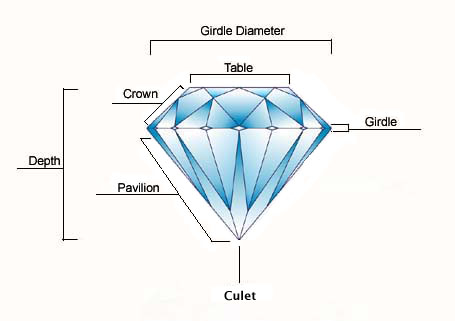

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('gemstone_train.csv')

In [5]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [6]:
df.tail()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681
193572,193572,0.71,Good,E,SI2,60.8,64.0,5.73,5.71,3.48,2258


In [7]:
df.shape

(193573, 11)

In [8]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [12]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [13]:
df.nunique()

id         193573
carat         248
cut             5
color           7
clarity         8
depth         153
table         108
x             522
y             521
z             349
price        8738
dtype: int64

In [14]:
df = df.drop('id', axis = 1)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [18]:
df['cut'].value_counts()

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64

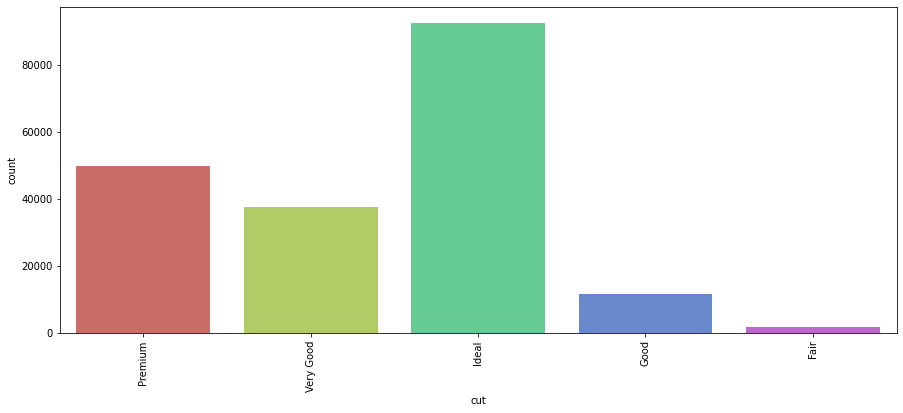

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(df['cut'], data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

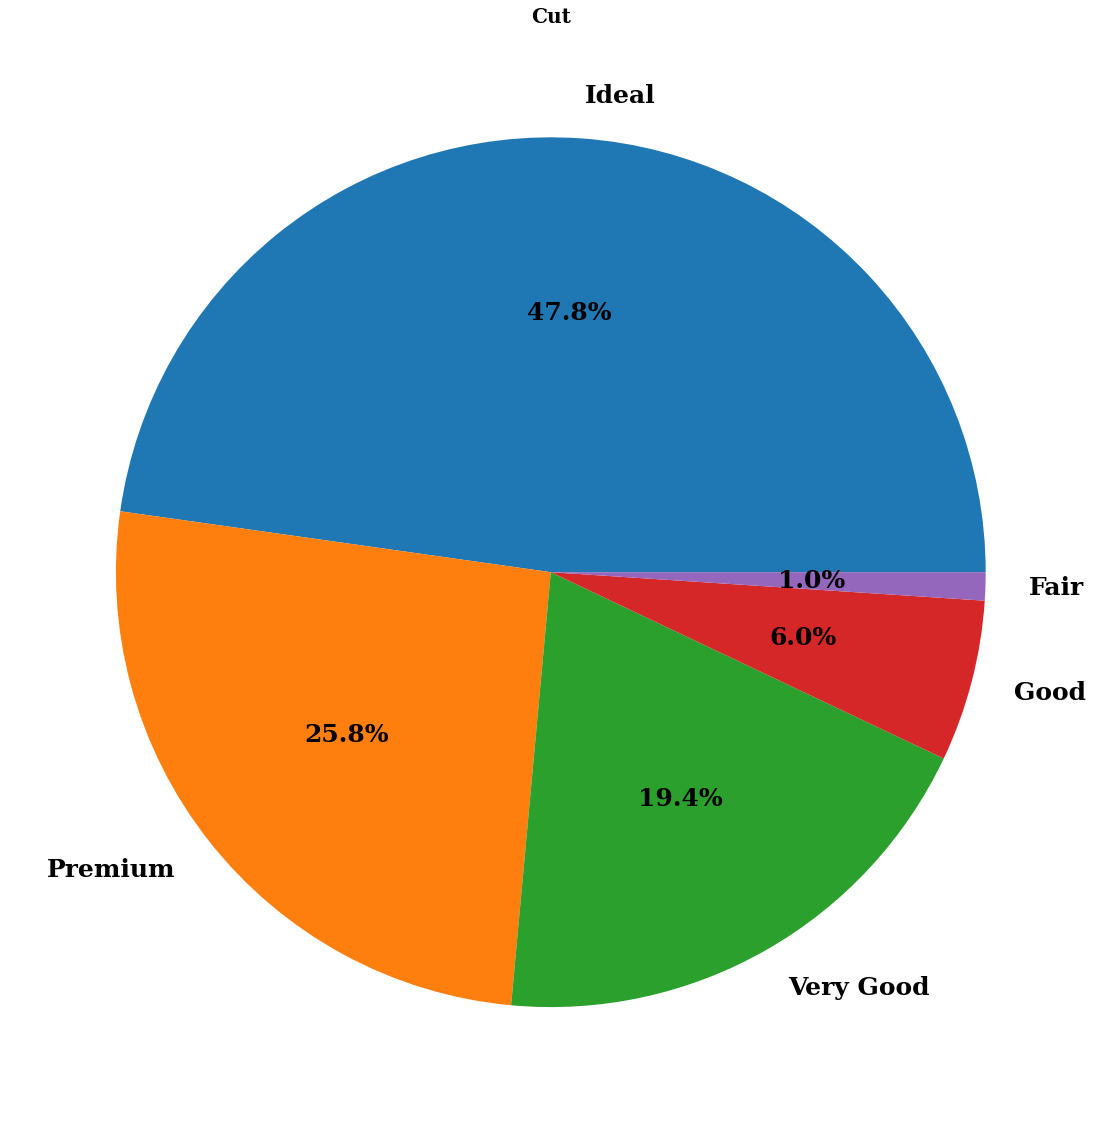

In [20]:
plt.figure(figsize=(30,20)) 
plt.pie(df['cut'].value_counts(), labels=df['cut'].value_counts().index, autopct='%1.1f%%', textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' }) 
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Cut', size=20, **hfont) 
plt.show()

In [21]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [22]:
df['color'].value_counts()

G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64

In [23]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [24]:
df['clarity'].value_counts()

SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64

In [25]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [26]:
numeric_df

,carat,depth,table,x,y,z,price
0,1.52,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,61.6,56.0,4.38,4.41,2.71,666
4,1.70,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...
193568,0.31,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,62.9,55.0,4.45,4.49,2.81,681


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
object_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in object_cols:
    df[col] = le.fit_transform(df[col])

In [29]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,3,2,5,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,4,6,3,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,2,3,4,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,2,3,4,61.6,56.0,4.38,4.41,2.71,666
4,1.70,3,3,5,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,2,0,7,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,3,3,7,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,4,2,2,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,4,0,2,62.9,55.0,4.45,4.49,2.81,681


In [30]:
df['cut'].unique()

array([3, 4, 2, 1, 0])

In [31]:
#Once we’ve encoded the ordinal variables, let’s get rid of any outliers and/or nonsense data.
#First, any observations with an X,Y, or Z dimension of 0 are removed.

In [32]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)

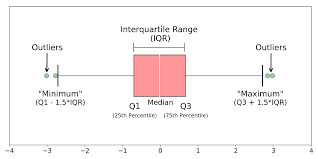

In [33]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

carat         0.63
cut           1.00
color         3.00
clarity       3.00
depth         1.10
table         2.00
x             1.81
y             1.80
z             1.13
price      4457.50
dtype: float64


In [34]:
df_new = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]

In [35]:
df_new.shape

(168646, 10)

In [36]:
df.shape

(193563, 10)

In [37]:
# we’ll cut the dataset down to the 99th percentile based on a few different variables to get rid of the most egregious 
# outliers. This is by no means a nuanced approach to handling outliers and a lot more effort would be put into this portion 
# of the work in a real-world scenario.

In [38]:
df = df[df['depth'] < df['depth'].quantile(0.99)]
df = df[df['table'] < df['table'].quantile(0.99)]
df = df[df['x'] < df['x'].quantile(0.99)]
df = df[df['y'] < df['y'].quantile(0.99)]
df = df[df['z'] < df['z'].quantile(0.99)]

In [39]:
df_corr = df.corr()

In [40]:
df_corr

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,0.103085,0.242231,-0.193428,0.032269,0.228648,0.985096,0.984636,0.984711,0.931112
cut,0.103085,1.000000,0.018712,-0.048792,-0.048882,0.396600,0.099412,0.099936,0.094783,0.077381
color,0.242231,0.018712,1.000000,0.030847,0.039859,0.025876,0.222926,0.223057,0.225534,0.151136
clarity,-0.193428,-0.048792,0.030847,1.000000,-0.048311,-0.092867,-0.213067,-0.212430,-0.216115,-0.059071
depth,0.032269,-0.048882,0.039859,-0.048311,1.000000,-0.199191,-0.008572,-0.008189,0.080256,0.009325
table,0.228648,0.396600,0.025876,-0.092867,-0.199191,1.000000,0.232246,0.227347,0.211965,0.177726
x,0.985096,0.099412,0.222926,-0.213067,-0.008572,0.232246,1.000000,0.999148,0.995567,0.891314
y,0.984636,0.099936,0.223057,-0.212430,-0.008189,0.227347,0.999148,1.000000,0.995603,0.891086
z,0.984711,0.094783,0.225534,-0.216115,0.080256,0.211965,0.995567,0.995603,1.000000,0.889085
price,0.931112,0.077381,0.151136,-0.059071,0.009325,0.177726,0.891314,0.891086,0.889085,1.000000


In [41]:
import numpy as np

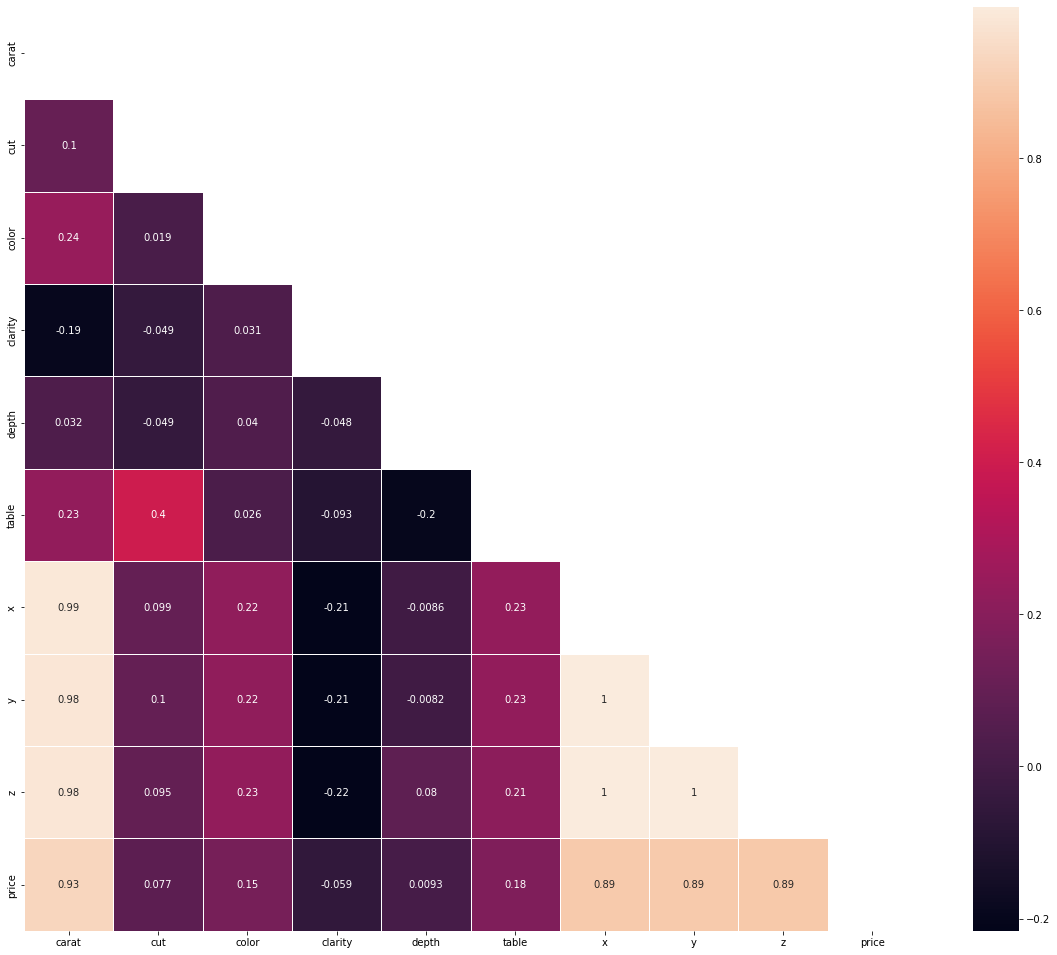

In [42]:
plt.figure(figsize=(20, 17))
matrix = np.triu(df_corr)
sns.heatmap(df_corr, annot=True, linewidth=.8, mask=matrix, cmap="rocket");
plt.show()

In [43]:
X = df.drop('price', axis=1)
y = df['price']

In [44]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[0.31560244 0.00186133 0.02879206 0.05118966 0.00323053 0.00295912
 0.23992009 0.21614491 0.14029986]


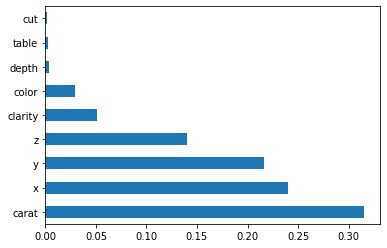

In [45]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [46]:
top_10 = pd.DataFrame({'Feature Importance': feat_importances.nlargest(10)})

In [47]:
top_10

,Feature Importance
carat,0.315602
x,0.239920
y,0.216145
z,0.140300
clarity,0.051190
color,0.028792
depth,0.003231
table,0.002959
cut,0.001861


In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [49]:
X = scaler.fit_transform(X)

In [50]:
from sklearn.model_selection import train_test_split 

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred = reg.predict(X_test)

In [56]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared score: {r2}")

Mean Squared Error: 1020450.7190548304
R-squared score: 0.914708026766423


In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
tree_reg = DecisionTreeRegressor()

In [59]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [60]:
y_pred = tree_reg.predict(X_test)

In [61]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared score: {r2}")

Mean Squared Error: 500269.163197432
R-squared score: 0.9581861786362986


In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rf_reg = RandomForestRegressor()

In [64]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [65]:
y_pred = rf_reg.predict(X_test)

In [66]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared score: {r2}")

Mean Squared Error: 282724.9319934646
R-squared score: 0.9763691015335002


In [67]:
import pickle

In [89]:
filename = 'finalized_model.pkl'

In [90]:
pickle.dump(rf_reg, open(filename, 'wb'))

In [91]:
import joblib

In [92]:
joblib.dump(rf_reg, "rf_model.sav")

['rf_model.sav']

In [70]:
import xgboost as xgb

In [71]:
xgb_reg = xgb.XGBRegressor()

In [72]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [73]:
y_pred = xgb_reg.predict(X_test)

In [74]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared score: {r2}")

Mean Squared Error: 264421.5155893111
R-squared score: 0.9778989495436736


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)

In [76]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [77]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(1)
])

In [78]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [79]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

In [80]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
3400/3400 [==============================] - 16s 4ms/step - loss: 21638568.0000 - mae: 3346.4678 - mse: 21638568.0000 - val_loss: 15851636.0000 - val_mae: 2913.8318 - val_mse: 15851636.0000
Epoch 2/10
3400/3400 [==============================] - 13s 4ms/step - loss: 10465180.0000 - mae: 2293.1128 - mse: 10465180.0000 - val_loss: 4465777.0000 - val_mae: 1590.2097 - val_mse: 4465777.0000
Epoch 3/10
3400/3400 [==============================] - 13s 4ms/step - loss: 2926306.2500 - mae: 1114.8354 - mse: 2926306.2500 - val_loss: 987701.9375 - val_mae: 649.1518 - val_mse: 987701.9375
Epoch 4/10
3400/3400 [==============================] - 13s 4ms/step - loss: 1606903.6250 - mae: 797.2800 - mse: 1606903.6250 - val_loss: 636767.6250 - val_mae: 423.9140 - val_mse: 636767.6250
Epoch 5/10
3400/3400 [==============================] - 13s 4ms/step - loss: 1540823.7500 - mae: 780.8787 - mse: 1540823.7500 - val_loss: 663849.5000 - val_mae: 450.6829 - val_mse: 663849.5000
Epoch 6/10
3400/3400

In [81]:
y_pred = model.predict(X_test)

1417/1417 [==============================] - 3s 2ms/step


In [82]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared score: {r2}")

Mean Squared Error: 520171.06994044915
R-squared score: 0.9565227245708295


In [83]:
xgb_reg.save_model('xgb_model.json')

In [86]:
import streamlit as st

print(st.__version__)


1.12.2


In [85]:
import pandas as pd

print(pd.__version__)


1.4.3


In [88]:
import pickle

print(pickle.format_version)



4.0
